# 05_Score Distribution_Distilbert

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define File Paths

In [2]:
fname_result_pkl = '../Data/Output/ResultBoth_Distilbert.pkl'

### Read the Result

In [3]:
df_result = pd.read_pickle(fname_result_pkl)

In [4]:
df_result

,doc_id,fname,sentence,goal01,goal02,goal03,goal04,goal05,goal06,goal07,...,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17,label,score
0,1,Asda_2020.pdf,Our action on sustainability supports the broa...,0.220957,0.249609,0.209004,0.140543,0.302925,0.211519,0.161349,...,0.221673,0.320755,0.243053,0.316457,0.310363,0.266566,0.314579,0.301656,Positive,1.00
1,1,Asda_2020.pdf,"In particular, our efforts are contributing to...",0.247329,0.282171,0.244253,0.187107,0.321928,0.249514,0.175626,...,0.231982,0.318060,0.236173,0.324246,0.298038,0.283017,0.303132,0.284681,Positive,1.00
2,1,Asda_2020.pdf,"For example, our work to tackle food poverty i...",0.239850,0.288944,0.202165,0.158243,0.244996,0.173143,0.131375,...,0.165640,0.270407,0.211620,0.294024,0.282431,0.283044,0.311684,0.272534,Positive,0.99
3,1,Asda_2020.pdf,Our CCFB strategy covers every aspect of our b...,0.157094,0.224665,0.140007,0.108842,0.212423,0.155067,0.143242,...,0.154378,0.153755,0.101164,0.180990,0.223748,0.151392,0.173541,0.154607,Positive,0.99
4,1,Asda_2020.pdf,It also covers International Procurement and L...,0.163866,0.202955,0.155638,0.131375,0.238785,0.139401,0.129099,...,0.171683,0.183722,0.090505,0.175276,0.187808,0.142089,0.164518,0.144709,Positive,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168271,84,Toyota_2023.pdf,Policy and Environmental Management > Environm...,0.214285,0.240569,0.191189,0.185037,0.260155,0.234097,0.201038,...,0.252605,0.323585,0.276730,0.318597,0.345756,0.309611,0.333787,0.324321,Negative,0.02
168272,84,Toyota_2023.pdf,Environmental Data [O] Remanufactured and Used...,0.113916,0.153440,0.114095,0.094321,0.159580,0.110153,0.082341,...,0.113817,0.245668,0.303303,0.320671,0.328372,0.292591,0.263292,0.249364,Negative,0.01
168273,84,Toyota_2023.pdf,306-2 Management of significant waste-related ...,0.155386,0.216601,0.160928,0.133781,0.191180,0.150989,0.134371,...,0.182886,0.265438,0.285949,0.295571,0.356245,0.336346,0.338445,0.354660,Negative,0.03
168274,84,Toyota_2023.pdf,407-1 Operations and suppliers in which the ri...,0.241352,0.238156,0.235872,0.244054,0.231353,0.268405,0.244760,...,0.233353,0.233371,0.185475,0.189659,0.195256,0.186064,0.204810,0.209217,Negative,0.03


In [5]:
df_result = df_result.reindex(['doc_id', 'fname', 'sentence','label', 'score',
                               'goal01', 'goal02', 'goal03', 'goal04', 'goal05', 'goal06', 'goal07',
                               'goal08', 'goal09', 'goal10', 'goal11', 'goal12', 'goal13', 'goal14',
                               'goal15', 'goal16', 'goal17'], axis=1)

In [6]:
df_result

,doc_id,fname,sentence,label,score,goal01,goal02,goal03,goal04,goal05,...,goal08,goal09,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
0,1,Asda_2020.pdf,Our action on sustainability supports the broa...,Positive,1.00,0.220957,0.249609,0.209004,0.140543,0.302925,...,0.215691,0.296752,0.221673,0.320755,0.243053,0.316457,0.310363,0.266566,0.314579,0.301656
1,1,Asda_2020.pdf,"In particular, our efforts are contributing to...",Positive,1.00,0.247329,0.282171,0.244253,0.187107,0.321928,...,0.230185,0.322435,0.231982,0.318060,0.236173,0.324246,0.298038,0.283017,0.303132,0.284681
2,1,Asda_2020.pdf,"For example, our work to tackle food poverty i...",Positive,0.99,0.239850,0.288944,0.202165,0.158243,0.244996,...,0.201546,0.242778,0.165640,0.270407,0.211620,0.294024,0.282431,0.283044,0.311684,0.272534
3,1,Asda_2020.pdf,Our CCFB strategy covers every aspect of our b...,Positive,0.99,0.157094,0.224665,0.140007,0.108842,0.212423,...,0.163626,0.156430,0.154378,0.153755,0.101164,0.180990,0.223748,0.151392,0.173541,0.154607
4,1,Asda_2020.pdf,It also covers International Procurement and L...,Positive,1.00,0.163866,0.202955,0.155638,0.131375,0.238785,...,0.191975,0.146139,0.171683,0.183722,0.090505,0.175276,0.187808,0.142089,0.164518,0.144709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168271,84,Toyota_2023.pdf,Policy and Environmental Management > Environm...,Negative,0.02,0.214285,0.240569,0.191189,0.185037,0.260155,...,0.221959,0.313757,0.252605,0.323585,0.276730,0.318597,0.345756,0.309611,0.333787,0.324321
168272,84,Toyota_2023.pdf,Environmental Data [O] Remanufactured and Used...,Negative,0.01,0.113916,0.153440,0.114095,0.094321,0.159580,...,0.105566,0.225363,0.113817,0.245668,0.303303,0.320671,0.328372,0.292591,0.263292,0.249364
168273,84,Toyota_2023.pdf,306-2 Management of significant waste-related ...,Negative,0.03,0.155386,0.216601,0.160928,0.133781,0.191180,...,0.154997,0.261323,0.182886,0.265438,0.285949,0.295571,0.356245,0.336346,0.338445,0.354660
168274,84,Toyota_2023.pdf,407-1 Operations and suppliers in which the ri...,Negative,0.03,0.241352,0.238156,0.235872,0.244054,0.231353,...,0.254164,0.226894,0.233353,0.233371,0.185475,0.189659,0.195256,0.186064,0.204810,0.209217


In [7]:
df_result.columns

Index(['doc_id', 'fname', 'sentence', 'label', 'score', 'goal01', 'goal02',
       'goal03', 'goal04', 'goal05', 'goal06', 'goal07', 'goal08', 'goal09',
       'goal10', 'goal11', 'goal12', 'goal13', 'goal14', 'goal15', 'goal16',
       'goal17'],
      dtype='object')

### Convert the Score Range

In [8]:
col_list1 = list(df_result.columns[:5])
col_list2 = list(df_result.columns[5:])

In [9]:
MAX = df_result[col_list2].max().max()
MAX

np.float64(0.4765605628490448)

In [10]:
MIN = df_result[col_list2].min().min()
MIN

np.float64(-0.1458437144756317)

In [11]:
def func(x):
    return (x - MIN) * 100 / (MAX - MIN)

In [12]:
df_result_s = pd.concat([df_result[col_list1], df_result[col_list2].applymap(func)], axis=1)

/var/folders/l1/j74c0f2s2273qr62tb9_bv1w0000gn/T/ipykernel_96671/3337046953.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_result_s = pd.concat([df_result[col_list1], df_result[col_list2].applymap(func)], axis=1)


### Create New Columns: Company & Year

In [13]:
df_result_s['company'] = df_result_s['fname'].str.split('_').apply(lambda x: x[0])

In [14]:
df_result_s['year'] = df_result_s['fname'].str.split(r'_|\(|\-|\.').apply(lambda x: x[1])

In [15]:
df_result_s.round(2)

,doc_id,fname,sentence,label,score,goal01,goal02,goal03,goal04,goal05,...,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17,company,year
0,1,Asda_2020.pdf,Our action on sustainability supports the broa...,Positive,1.00,58.93,63.54,57.01,46.01,72.10,...,59.05,74.97,62.48,74.28,73.30,66.26,73.97,71.90,Asda,2020
1,1,Asda_2020.pdf,"In particular, our efforts are contributing to...",Positive,1.00,63.17,68.77,62.68,53.49,75.16,...,60.70,74.53,61.38,75.53,71.32,68.90,72.14,69.17,Asda,2020
2,1,Asda_2020.pdf,"For example, our work to tackle food poverty i...",Positive,0.99,61.97,69.86,55.91,48.86,62.80,...,50.05,66.88,57.43,70.67,68.81,68.91,73.51,67.22,Asda,2020
3,1,Asda_2020.pdf,Our CCFB strategy covers every aspect of our b...,Positive,0.99,48.67,59.53,45.93,40.92,57.56,...,48.24,48.14,39.69,52.51,59.38,47.76,51.31,48.27,Asda,2020
4,1,Asda_2020.pdf,It also covers International Procurement and L...,Positive,1.00,49.76,56.04,48.44,44.54,61.80,...,51.02,52.95,37.97,51.59,53.61,46.26,49.86,46.68,Asda,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168271,84,Toyota_2023.pdf,Policy and Environmental Management > Environm...,Negative,0.02,57.86,62.08,54.15,53.16,65.23,...,64.02,75.42,67.89,74.62,78.98,73.18,77.06,75.54,Toyota,2023
168272,84,Toyota_2023.pdf,Environmental Data [O] Remanufactured and Used...,Negative,0.01,41.73,48.09,41.76,38.59,49.07,...,41.72,62.90,72.16,74.95,76.19,70.44,65.73,63.50,Toyota,2023
168273,84,Toyota_2023.pdf,306-2 Management of significant waste-related ...,Negative,0.03,48.40,58.23,49.29,44.93,54.15,...,52.82,66.08,69.38,70.92,80.67,77.47,77.81,80.41,Toyota,2023
168274,84,Toyota_2023.pdf,407-1 Operations and suppliers in which the ri...,Negative,0.03,62.21,61.70,61.33,62.64,60.60,...,60.92,60.93,53.23,53.90,54.80,53.33,56.34,57.05,Toyota,2023


### Distribution: Sentiment Score

In [16]:
from matplotlib import rcParams
rcParams['font.size'] = 14
rcParams['axes.unicode_minus'] = False

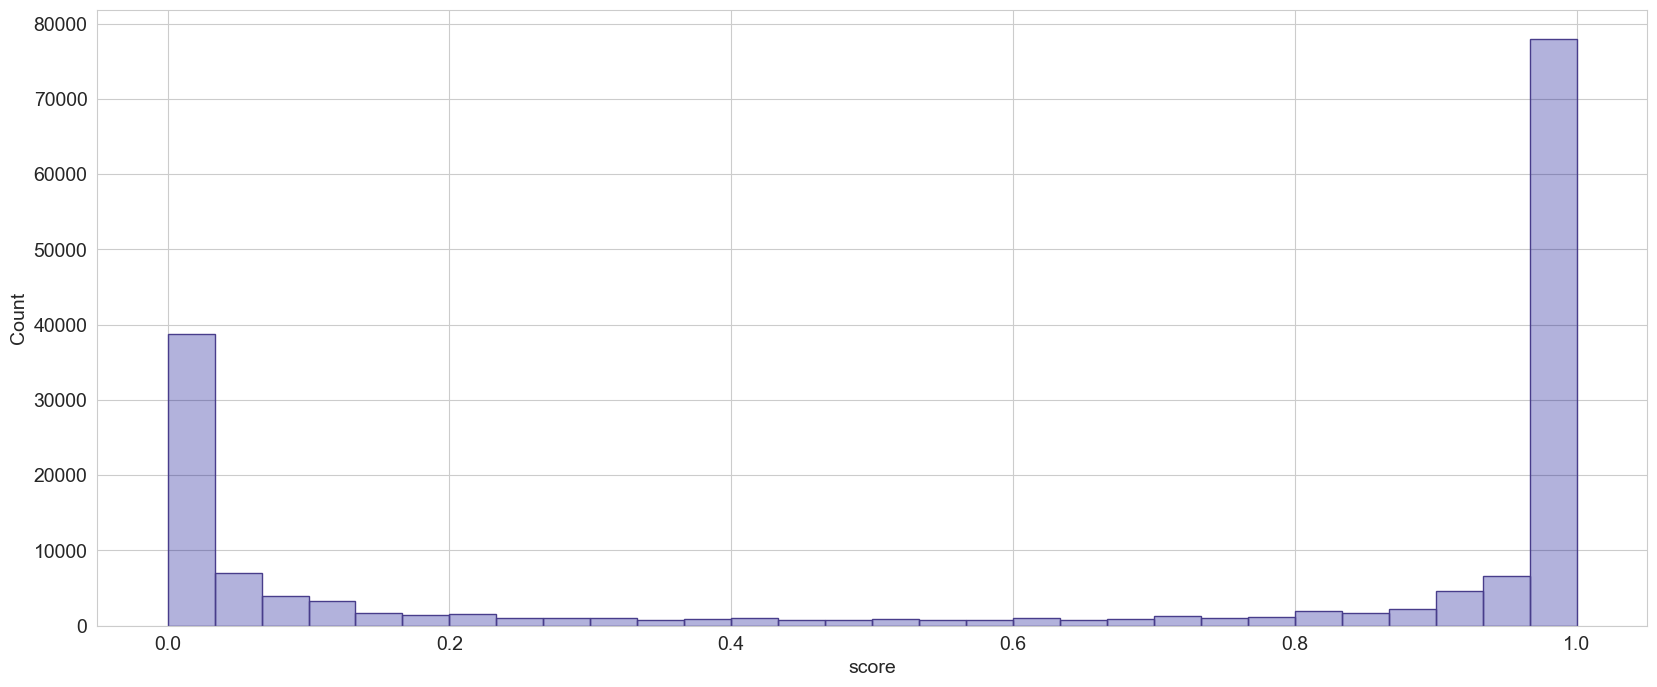

In [17]:
plt.rc('figure', figsize=(20, 8))
sns.set_style('whitegrid')
sns.histplot(df_result_s['score'], color='darkblue', alpha=0.3, edgecolor='darkslateblue')
plt.show()

### Distribution: Similarity Score

In [18]:
sr_ss= pd.concat([df_result_s['goal01'], df_result_s['goal02'], df_result_s['goal03'], df_result_s['goal04'], 
                  df_result_s['goal05'], df_result_s['goal06'], df_result_s['goal07'], df_result_s['goal08'], 
                  df_result_s['goal09'], df_result_s['goal10'], df_result_s['goal11'], df_result_s['goal12'], 
                  df_result_s['goal13'], df_result_s['goal14'], df_result_s['goal15'], df_result_s['goal16'], 
                  df_result_s['goal17']])

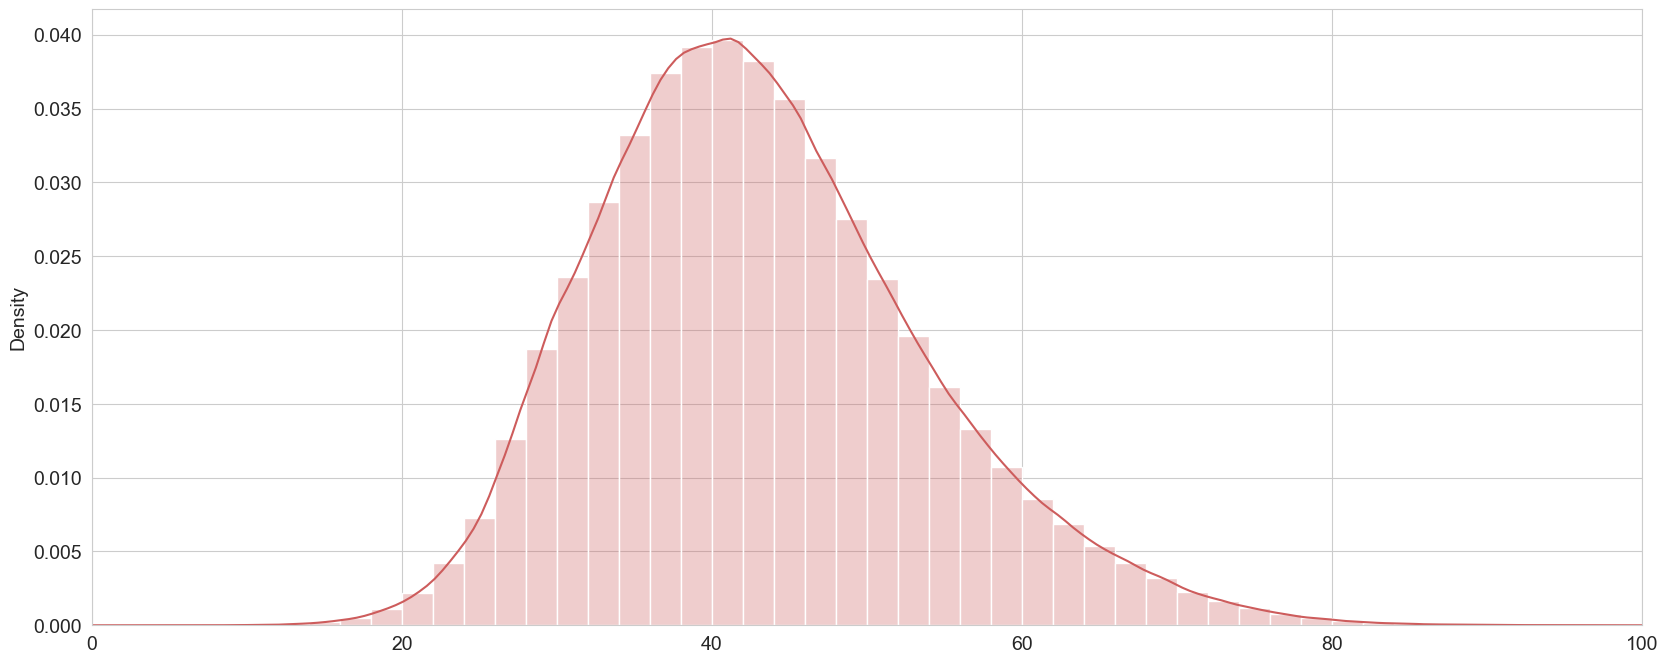

In [19]:
plt.rc('figure', figsize=(20, 8))
sns.set_style('whitegrid')

sns.histplot(sr_ss, color='indianred', alpha=0.3, kde=True, stat='density', binwidth=2)

plt.xlim(0,100)
plt.show()

### Average & Standard Deviation: Similarity Score

In [20]:
round(sr_ss.mean(), 2)

np.float64(43.08)

In [21]:
round(sr_ss.std(), 2)

np.float64(10.6)

---

In [ ]:
# End of file